In [ ]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Loading Data

path='/content/drive/MyDrive/DataSource/Chapter06DataSet.csv'
load_data_res=pd.read_csv(path)


In [ ]:
# Membentuk data dalam DataFrame

df = pd.DataFrame(load_data_res)
df

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


# Business Understanding

Sabarudin Hidayah is a program director for a major health insurance provider. Recently he has been reading in medical journals and other articles, and found a strong emphasis on the influence of weight, gender and cholesterol on the development of coronary heart disease. The research he’s read confirms time after time that there is a connection between these three variables, and while there is little that can be done about one’s gender, there are certainly life choices that can be made to alter one’s cholesterol and weight. He begins brainstorming ideas for her company to offer weight and cholesterol management programs to individuals who receive health insurance through her employer. As he considers where her efforts might be most effective, he finds herself wondering if there are natural groups of individuals who are most at risk for high weight and high cholesterol, and if there are such groups, where the natural dividing lines between the groups occur.

Problem : Clustering, Unsupervised Learning

GOAL : Predictif Tingkat Resiko Jantung Koroner dengan Metode Clustering.

Algoritma : K-Means

# Data Understanding

In [ ]:
df

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


from matplotlib import pyplot as plt
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cholesterol', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

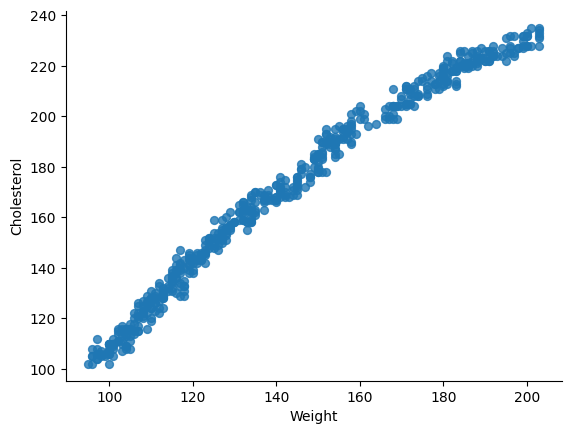

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Colesterol dan Weight

ada pola hubungan berbanding lurus antara colesterol dan weight
artinya jika weight bertambah maka colesterol pun bertambah

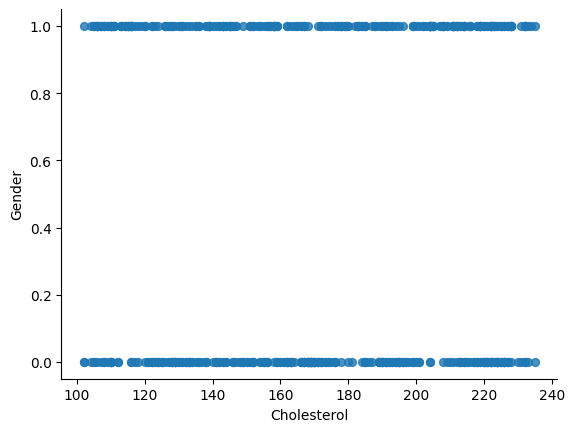

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cholesterol', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Analisis Kolesterol

Kolesterol Total:

- Normal: Kurang dari 200 mg/dL (miligram per desiliter) atau 5.2 mmol/L (milimol per liter).

- Tidak Normal : 200 mg/dL atau lebih.

Kolesterol LDL (Low-Density Lipoprotein, disebut juga "Kolestreol jahat").

- Normal : Kurang dari 100 mg/dL atau 2.6 mmol/L.

- Tidak Normal : 100mg/dL atau lebih.

Kolesterol HDL ( High-Density Lipoprotein, disebut juga "Kolesterol Baik").

- Normal (tinggi) : 60mg/dL atau lebih dianggap baik untuk kesehatan jantung.

- Tidak Normal : Kurang dari 40mg/dL pada pria atau kurang dari 50mg/dL pada wanita dianggap rendah.

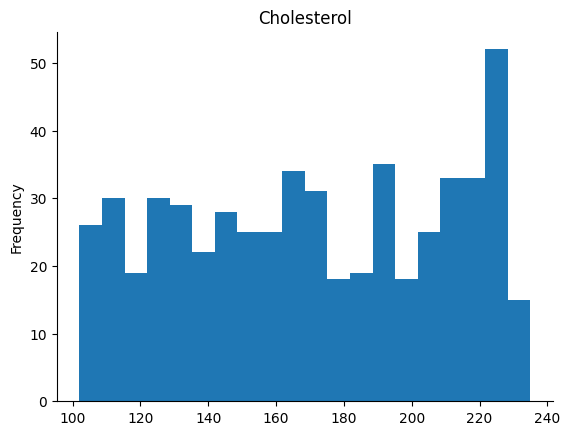

In [ ]:
from matplotlib import pyplot as plt
df['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Colesterol berdasarkan Jumlah Nasabah

1. Ada lebih dari 50 nasabah asuransi yang teridentifikasi high colesterol, dari grafik ditunjukkan pada range 20 sd 239.

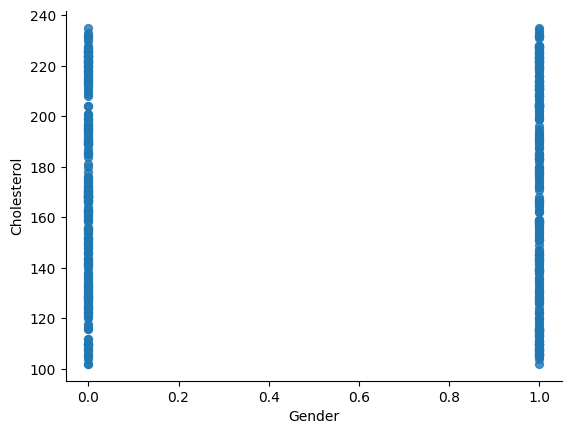

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Gender', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Gender VS Colesterol

Antara laki laki dan perempuan memiliki kesamaan,berpeluan kolesterol tinggi

# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

# Tidak dilakukan preparasi data
# Karena data dalam keadaan bersih dan memiliki tipe data numerik sesuai dengan algoritma nya.

# Pemodelan data dengan Clustering

# Evaluasi Clustering

1. Dibutuhkan untuk menentukan berapa nilai K yang akan di input kedalam n_cluster.
2. Akan digunakan Teknik Elbow methodologi untuk menemukan nilai K yang optimum.

In [ ]:
from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Menentukan Input Variabel

x=df[['Weight', 'Cholesterol', 'Gender']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

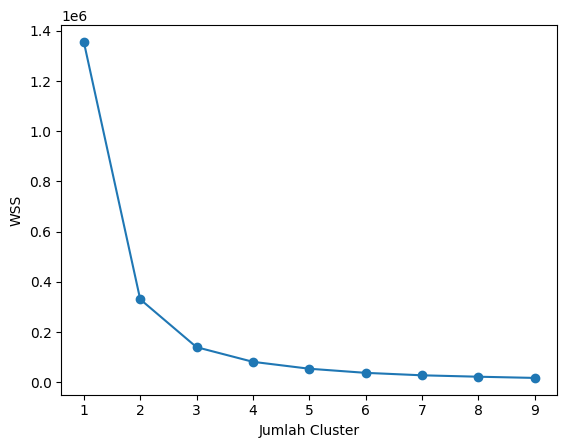

In [ ]:
# Elbow Method

cluster_range=range(1,10)
cluster_wss=[]

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show()

# ELBOW METHOD

Adalah salah satu teknik untuk menentukan n cluster, dimana n adalah nilai terbaik.

WSS = Within-Cluster Sum of Squares. Merupakan metrix yang digunakan untuk mengukur cluster.

Berdasarkan visualisasi diatas
Nilai n cluster terbaik versi Elblow method: 3 sd 4

lekukan 4 dst tidak boleh ( bukan nilai n cluster terbaik) karena lekukan tersebut sudah melandai.

# Klustering K-Means

In [ ]:
cls=KMeans(n_clusters=4, random_state=0)

# Membentuk Model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster']=model_cls.labels_

df

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2
...,...,...,...,...
542,172,207,1,0
543,129,157,1,2
544,107,115,1,1
545,117,147,1,2


In [ ]:
df['cluster'].value_counts()

1    152
0    147
2    140
3    108
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="Weight", y="Cholesterol", color="cluster",
                 size="Weight", hover_data=['Cholesterol'])
fig.show()

# Hasil Cluster

 Didapatkan 4 kelompok orang yang berisiko Jantung Koroner. Berikut ini Kelompok Cluster berdasarkan resiko:

 1. Cluster 0 : Cluster High Risk : Adalah kelompok nasabah yang memiliki resiko tinggi Jantung Koroner
 2. Cluster 3 : Cluster Potentional High Risk : Adalah kelompok nasabah yang memiliki kecenderungan resiko tinggi Jantung Koroner. Hal ini ditunjukkan cholesterol dan weight berada pada ambang batas NORMAL.
 3.  Cluster 2 : Cluster Moderat : Adalah kelompok nasabah yang berada di antara low risk dan potentional risk.
 4.  Cluster 1 : Cluster Low Risk : Adalah kelompok nasabah yang memiliki resiko rendah, cholesterol dan weight juga rendah.

Berapakah Jumlah Nasabah yang akan di prospek untuk mengikuti program baru " TREATMENT" mengurangi resiko jantung koroner ?

Penjumlahan Cluster 0 dan Cluster 3.

147 + 108 = 255 nasabah.